In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from data.captured.parula import parula, parula_black
from pathlib import Path
import yaml
data_dir = Path('.')/'data'/'captured'/'processed'
results_dir = Path('.')/'results_captured'

In [15]:
scene = 'poster'
data = np.load(data_dir/f'{scene}.npy', allow_pickle=True)[()]
with open(data_dir/f'{scene}.yml') as f:
    meta = yaml.safe_load(f)

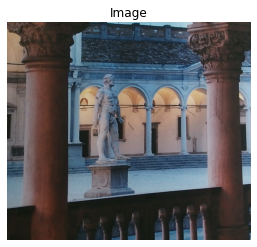

In [16]:
plt.imshow(data['image'])
plt.title('Image')
plt.axis('off');

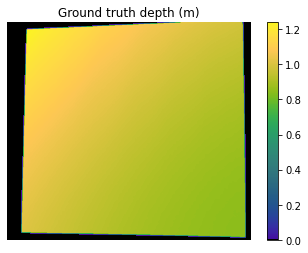

In [17]:
plt.imshow(data['depth'], cmap=parula_black)
plt.title('Ground truth depth (m)')
plt.colorbar()
plt.axis('off');

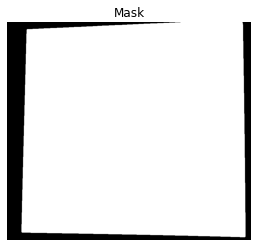

In [18]:
plt.imshow(data['mask'], cmap=plt.get_cmap('gray'))
plt.title('Mask')
plt.axis('off');

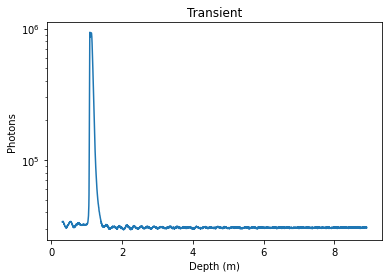

In [19]:
plt.semilogy(np.linspace(meta['min-depth'], meta['max-depth'], len(data['transient'])),
             data['transient'])
plt.title('Transient')
plt.ylabel('Photons')
plt.xlabel('Depth (m)');

In [20]:
# Plot qualitative comparison
# Run after prediction has been made
model = 'MiDaS'
mde = np.load(results_dir/f'{scene}'/f'{model}'/'mde.npy', allow_pickle=True)[()]
mde['depth'] = mde['depth'].squeeze()
mde_diff = np.abs(mde['depth'] - data['depth'])

transient = np.load(results_dir/f'{scene}'/f'{model}'/'transient.npy', allow_pickle=True)[()]
transient['depth'] = transient['depth'].squeeze()
transient_diff = np.abs(transient['depth'] - data['depth'])

diff_norm = mpl.colors.Normalize(vmin=min(np.min(mde_diff), np.min(transient_diff)),
                                 vmax=max(np.max(mde_diff), np.max(transient_diff)))

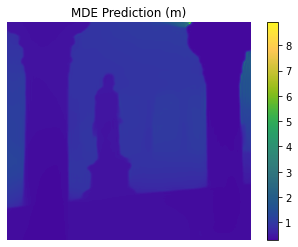

In [21]:
plt.imshow(mde['depth'].squeeze(), cmap=parula)
plt.title('MDE Prediction (m)')
plt.colorbar()
plt.axis('off');

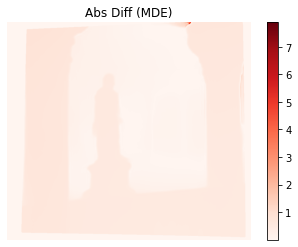

In [22]:
plt.imshow(mde_diff.squeeze()*data['mask'], cmap=plt.get_cmap('Reds'), norm=diff_norm)
plt.title('Abs Diff (MDE)')
plt.colorbar()
plt.axis('off');

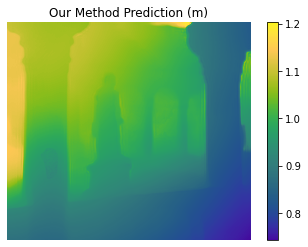

In [23]:
plt.imshow(transient['depth'], cmap=parula)
plt.title('Our Method Prediction (m)')
plt.colorbar()
plt.axis('off');

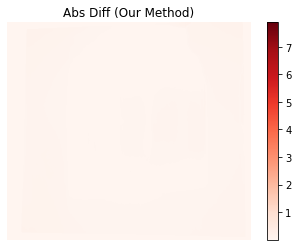

In [24]:
plt.imshow(transient_diff*data['mask'], cmap=plt.get_cmap('Reds'), norm=diff_norm)
plt.title('Abs Diff (Our Method)')
plt.colorbar()
plt.axis('off');